# SMS/Email Spam Classifier

In [1]:
# Importing necessary libraires
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string 


**Data Collection**

In [2]:
df = pd.read_csv(r'E:\Data_Analysis_Projects\Spam_classifier\data\spam.csv')


In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Dropping useless columns**

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)


In [7]:
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will �_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [8]:
df.rename(columns={'v1': 'target', 'v2':'message'}, inplace= True)

**Mapping target variables to binary values**

In [9]:
df['target'] = df['target'].map({'ham': 0, 'spam':1})


In [10]:
df.head()

target                                            message
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [11]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.shape

(5169, 2)

## Exploratory Data Analysis

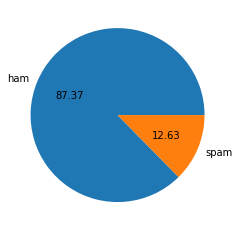

In [15]:
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Avirup
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Creating new features from the message column**

In [17]:
df['text_length'] = df['message'].apply(len)

<ipython-input-17-b70e3c374dbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['message'].apply(len)


In [18]:
df['word_count'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-18-c7b2228cff43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [19]:
df['sentance_count'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


<ipython-input-19-8d57e49a59cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentance_count'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [20]:
df.head()

target                                            message  text_length  \
0       0  Go until jurong point, crazy.. Available only ...          111   
1       0                      Ok lar... Joking wif u oni...           29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3       0  U dun say so early hor... U c already then say...           49   
4       0  Nah I don't think he goes to usf, he lives aro...           61   

   word_count  sentance_count  
0          24               2  
1           8               2  
2          37               2  
3          13               1  
4          15               1

In [21]:
df[df['target'] == 0][['text_length','word_count','sentance_count']].describe()

text_length   word_count  sentance_count
count  4516.000000  4516.000000     4516.000000
mean     70.456820    17.123339        1.815545
std      56.356802    13.491315        1.364098
min       2.000000     1.000000        1.000000
25%      34.000000     8.000000        1.000000
50%      52.000000    13.000000        1.000000
75%      90.000000    22.000000        2.000000
max     910.000000   220.000000       38.000000

In [22]:
df[df['target'] == 1][['text_length', 'word_count', 'sentance_count']].describe()


text_length  word_count  sentance_count
count   653.000000  653.000000      653.000000
mean    137.479326   27.675345        2.977029
std      30.014336    7.011513        1.493676
min      13.000000    2.000000        1.000000
25%     131.000000   25.000000        2.000000
50%     148.000000   29.000000        3.000000
75%     157.000000   32.000000        4.000000
max     223.000000   46.000000        9.000000

**Comparison of number of spam and ham messages**

<AxesSubplot:ylabel='Count'>

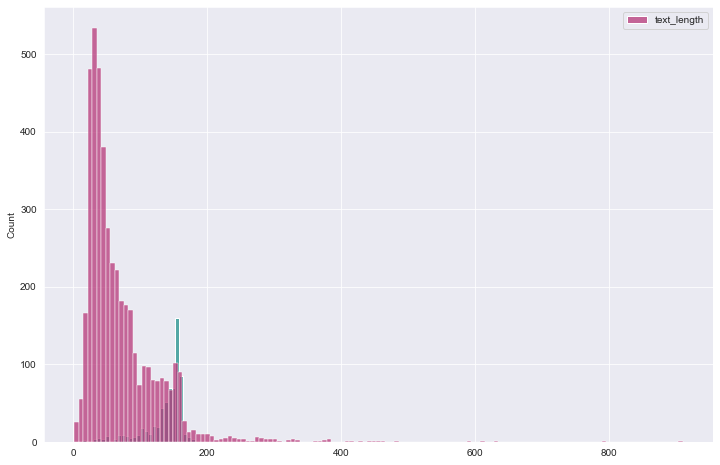

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 1][['text_length']], palette= 'viridis')
sns.histplot(df[df['target'] == 0][['text_length']])


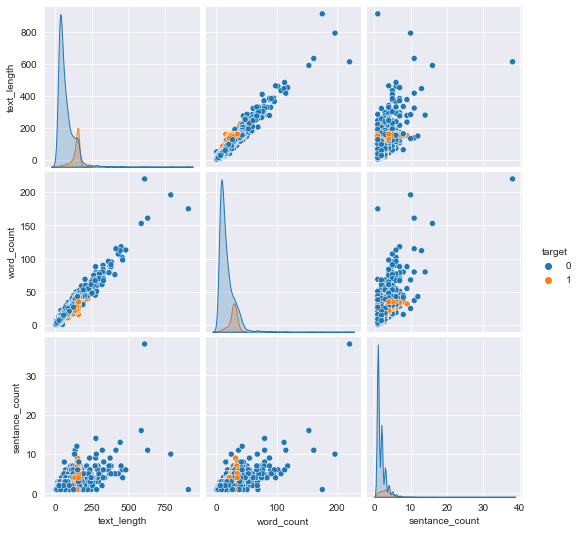

In [24]:
sns.pairplot(df, hue = 'target')

**Correlation Heatmap for all the features**

<AxesSubplot:>

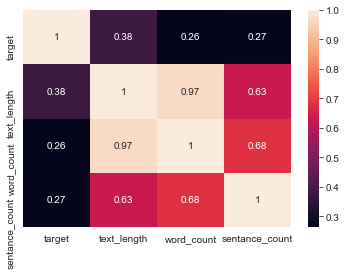

In [25]:
sns.heatmap(df.corr(), annot = True)

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [26]:

# Creating a funtion to to apply to various processing parameters
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)
            
    text = x[:] 
    x.clear() 
    
    for j in text:
        if j not in stopwords.words('english') and j not in string.punctuation:
            x.append(j)
            
    text = x[:]
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
    
    return ' '.join(x) 



In [28]:
df['transformed_text'] = df['message'].apply(text_transform)

<ipython-input-28-617001d013a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['message'].apply(text_transform)


In [29]:
df.head()

target                                            message  text_length  \
0       0  Go until jurong point, crazy.. Available only ...          111   
1       0                      Ok lar... Joking wif u oni...           29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3       0  U dun say so early hor... U c already then say...           49   
4       0  Nah I don't think he goes to usf, he lives aro...           61   

   word_count  sentance_count  \
0          24               2   
1           8               2   
2          37               2   
3          13               1   
4          15               1   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

**Creating wordclouds for spam and ham messages**

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,
               background_color='white')


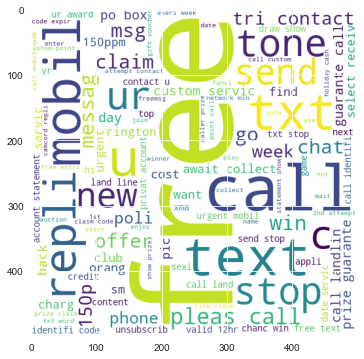

In [31]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)


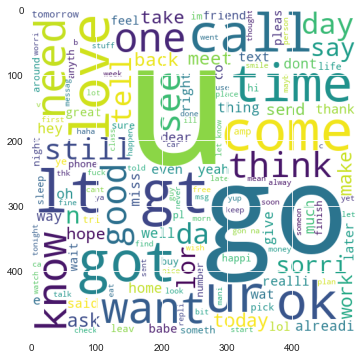

In [32]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)


In [33]:
spam = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam.append(word)
        

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

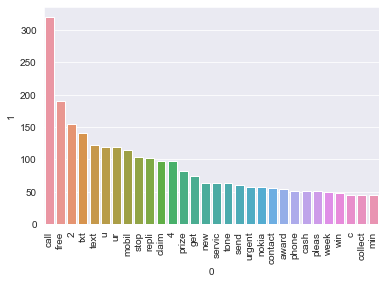

In [34]:
from collections import Counter  
sns.barplot(pd.DataFrame(Counter(spam).most_common(30))[0],pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation = 'vertical')

## Model Selection

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfid = TfidfVectorizer(max_features = 3000)
X= tfid.fit_transform(df['transformed_text']).toarray()


In [59]:
X.shape

(5169, 3000)

In [60]:
y = df['target'].values

Importing necessary dependencies

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix 

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state= 2)

In [63]:
gnb = GaussianNB() 
mnb = MultinomialNB() 
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(accuracy_score(y_test, pred1))
print(precision_score(y_test, pred1))


[[788 108]
 [ 26 112]]
0.8704061895551257
0.509090909090909


In [65]:
mnb.fit(X_train, y_train)
pred2 = mnb.predict(X_test)
print(confusion_matrix(y_test, pred2))
print(accuracy_score(y_test, pred2))
print(precision_score(y_test, pred2))


[[896   0]
 [ 29 109]]
0.971953578336557
1.0


In [66]:
bnb.fit(X_train, y_train)
pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test, pred3))
print(accuracy_score(y_test, pred3))
print(precision_score(y_test, pred3))

[[895   1]
 [ 16 122]]
0.9835589941972921
0.991869918699187


**We can see from the above results that the precision score is the highest while using Multinomial  Naive Bayes. We will be looking at the highest precision score in our models because accuracy score is not the right metric to follow in this circumstance.**

**To get a clearer picture we will use other popular models and check for the highest precision and accuracy score.**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [68]:

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [69]:
def classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test) 
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)

    return accuracy, precision
    


In [71]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = classifier(
        clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918


C:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [74]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(
), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [75]:
performance_df

Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2         NB  0.971954   1.000000
5         RF  0.975822   0.982906
8        ETC  0.979691   0.975610
0        SVC  0.974855   0.974576
4         LR  0.956480   0.969697
6   AdaBoost  0.961315   0.945455
10       xgb  0.968085   0.933884
9       GBDT  0.946809   0.927835
7        BgC  0.959381   0.869231
3         DT  0.930368   0.830000

**As we can see from the above observation that we are getting the highest accuracy and precision score using Naive Bayes.**

In [76]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))